# MIT-BIH dataset
## [WFDB Github](https://github.com/MIT-LCP/wfdb-python)

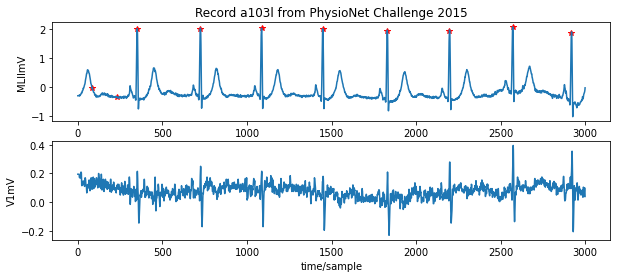

{'record_name': '106',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 3000,
 'base_time': None,
 'base_date': None,
 'comments': ['24 F 1581 654 x1', 'Inderal', 'The PVCs are multiform.'],
 'sig_name': ['MLII', 'V1'],
 'p_signal': array([[-0.31 ,  0.195],
        [-0.31 ,  0.195],
        [-0.31 ,  0.195],
        ...,
        [-0.145,  0.1  ],
        [-0.11 ,  0.085],
        [-0.035,  0.04 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['106.dat', '106.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [962, 1063],
 'checksum': [24162, 38756],
 'block_size': [0, 0]}

In [1]:
import wfdb
from wfdb.plot import plot
sampfrom=0
sampto=3000
record = wfdb.rdrecord('../data/mit-bih/106', physical=True, sampfrom=sampfrom, sampto=sampto)

annotation = wfdb.rdann('../data/mit-bih/106', 'atr', sampfrom=sampfrom, sampto = sampto)

wfdb.plot_wfdb(record=record, annotation=annotation,title='Record a103l from PhysioNet Challenge 2015', figsize=(10,4)) 
display(record.__dict__)


# ECG Preprocessing

## [Popular ECG R peak detectors written in python](https://zenodo.org/record/5653113#.YZS_IGBByUk)
## [ECG detector Github](https://github.com/berndporr/py-ecg-detectors)

In [2]:
import wfdb
from wfdb import processing
import matplotlib.pyplot as plt
import numpy as np

from ecgdetectors import Detectors

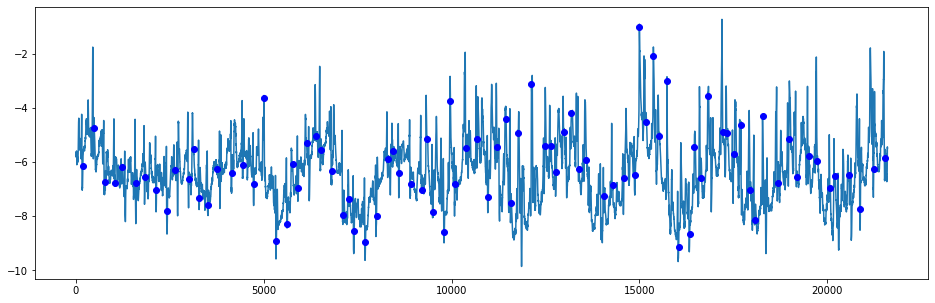

In [24]:
signals, fields = wfdb.rdsamp('../data/mit-bih-noise-stress-test-database-1.0.0/118e06', channels=[0], sampfrom=5*60*360, sampto=6*60*360)


unfiltered_ecg = []
for signal in signals:
    unfiltered_ecg.append(signal[0])

detectors = Detectors(360)

r_peaks = detectors.two_average_detector(unfiltered_ecg)
# r_peaks = detectors.matched_filter_detector(unfiltered_ecg,"templates/template_250hz.csv")
# r_peaks = detectors.swt_detector(unfiltered_ecg)
# r_peaks = detectors.engzee_detector(unfiltered_ecg)
# r_peaks = detectors.christov_detector(unfiltered_ecg)
# r_peaks = detectors.hamilton_detector(unfiltered_ecg)
# r_peaks = detectors.pan_tompkins_detector(unfiltered_ecg)

plt.figure(figsize=(16,5))
plt.plot(unfiltered_ecg)
for i in range(len(r_peaks)):
    plt.plot(r_peaks[i], unfiltered_ecg[r_peaks[i]], 'bo')

21600

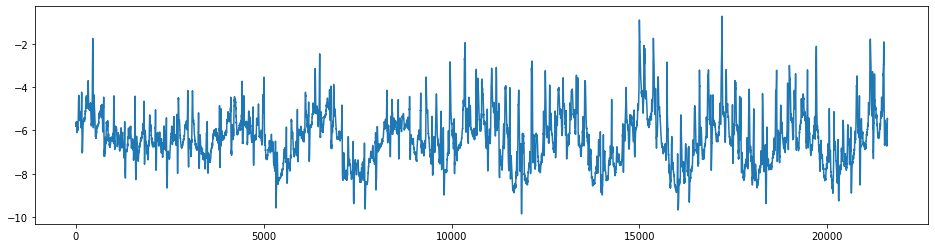

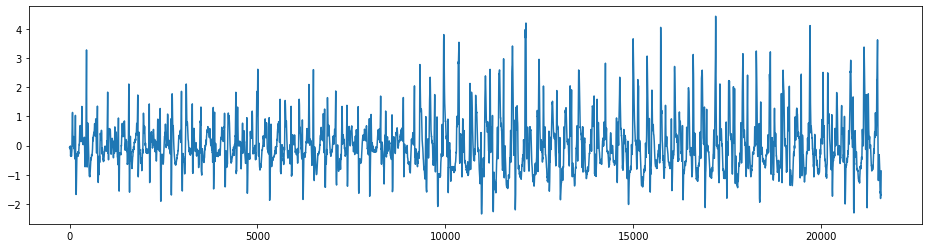

In [26]:
from scipy import signal
def butter_bandpass_filter(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band', analog=False)
    return b, a
b, a = butter_bandpass_filter(0.5, 40, 360 , 3)
ef = signal.filtfilt(b, a, unfiltered_ecg)

plt.figure(figsize=(16,4))
plt.plot(unfiltered_ecg)
plt.figure(figsize=(16,4))

plt.plot(ef)

len(ef)

In [22]:
print(b,a)

[ 0.02288752  0.         -0.06866256  0.          0.06866256  0.
 -0.02288752] [ 1.         -4.62777573  8.95054468 -9.32566688  5.5548558  -1.79598209
  0.24402435]


C:\Users\10712064\AppData\Local\Continuum\anaconda3\envs\Thor\lib\site-packages\ipykernel_launcher.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rx" (-> marker='x'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app
C:\Users\10712064\AppData\Local\Continuum\anaconda3\envs\Thor\lib\site-packages\ipykernel_launcher.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app


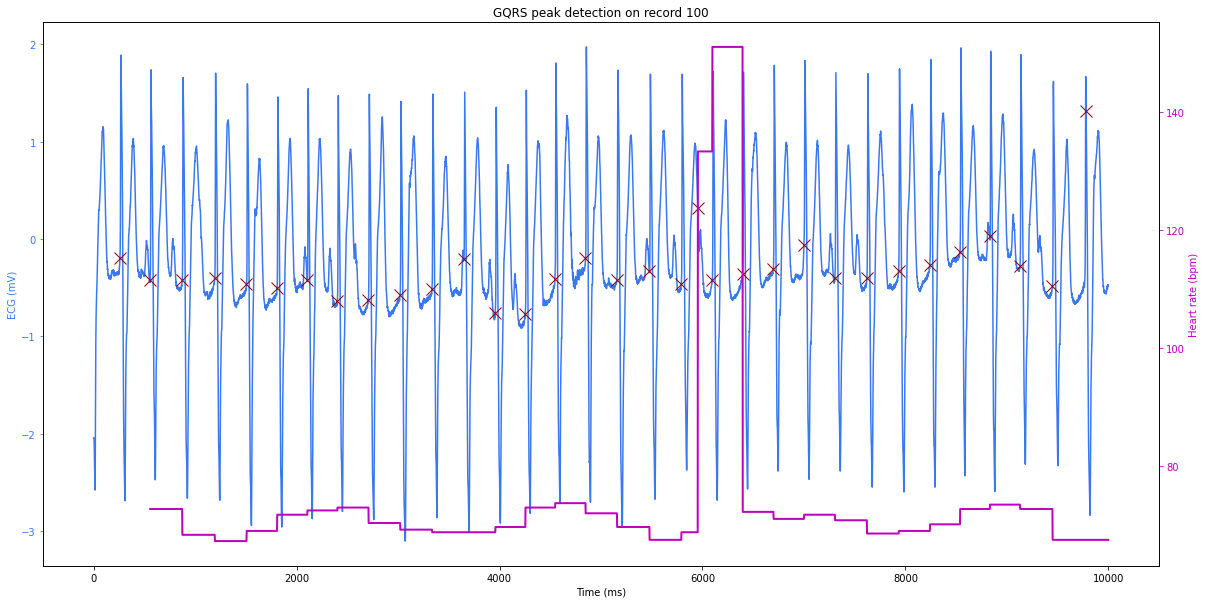

Corrected GQRS detected peak indices: [309, 607, 923, 1243, 1555, 1855, 2154, 2452, 2760, 3071, 3383, 3700, 4008, 4302, 4595, 4896, 5210, 5533, 5844, 5860, 6145, 6445, 6746, 7051, 7358, 7673, 7986, 8292, 8586, 8881, 9182, 9502, 9820]


C:\Users\10712064\AppData\Local\Continuum\anaconda3\envs\Thor\lib\site-packages\ipykernel_launcher.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rx" (-> marker='x'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app
C:\Users\10712064\AppData\Local\Continuum\anaconda3\envs\Thor\lib\site-packages\ipykernel_launcher.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app


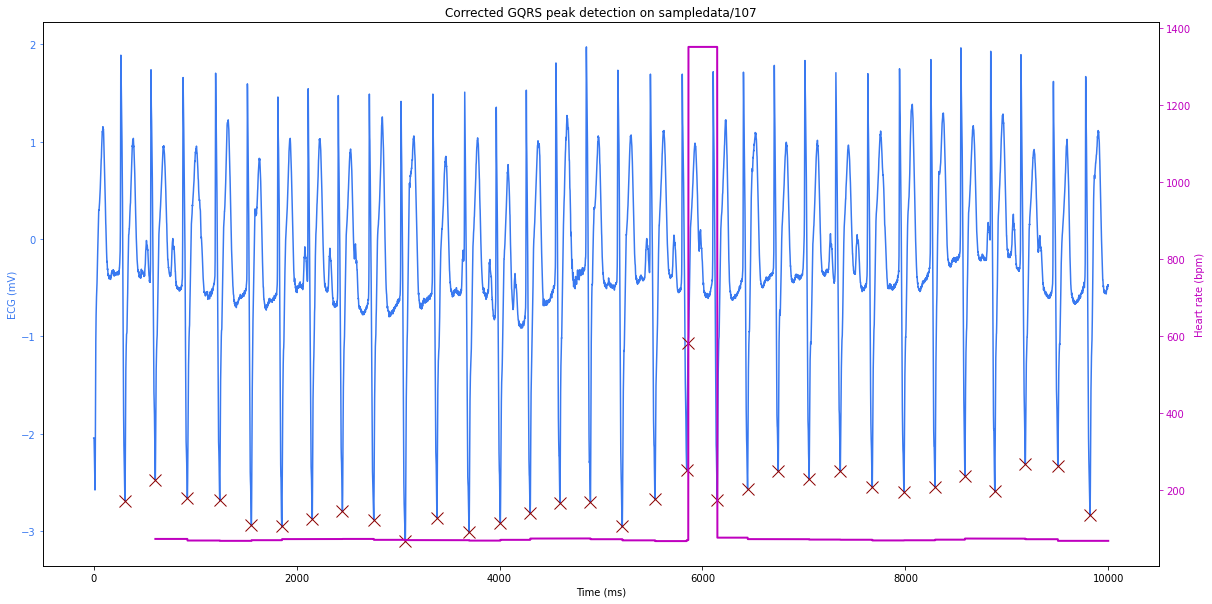

In [5]:
# Demo 19 - Use the GQRS detection algorithm and correct the peaks

def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

# Load the WFDB record and the physical samples
record = wfdb.rdrecord('../data/mit-bih/107', sampfrom=0, sampto=10000, channels=[0])

# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

# Plot results
peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection on record 100")
    
# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0], 
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius, 
                                                     smooth_window_size=150)

# Display results
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on sampledata/107")
    